# To get started

In [85]:
import glob, pylab, pandas as pd
import pydicom, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import skimage

The seedling images should be located in a folder called data. The seedling categories:
1. Black-grass
2. Charlock
3. Cleavers
4. Common Chickweed
5. Common wheat
6. Fat Hen
7. Loose Silky-bent
8. Maize
9. Scentless Mayweed
10. Shepherd'd Purse
11. Small-flowered Cranesbill
12. Sugar beet 
<br>


Within each seedling category, the images (pgn) are numbered 1,2,....

In [86]:
#Each of the images has a different shape but three channels, rbg
import imageio
im1 = imageio.imread(".\\data\\Black-grass\\1.png")
im2 = imageio.imread(".\\data\\Black-grass\\7.png")
im3 = imageio.imread(".\\data\\Black-grass\\200.png")
print(im1.shape)
print(im2.shape)
print(im3.shape)

(138, 138, 3)
(145, 145, 3)
(641, 641, 3)


Lets train a VGG16 model with weights pre-trained on ImageNet on all our categories.  We resize all images to 224X2254

In [104]:
# CREATING A SIMPLE CNN USING VGG16
import keras as k
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Flatten, Input
from keras.models import Model

#input layer description + creation
inLayer = Input(shape=(1, 224, 224, 3))

#using the pretrained vgg16 model from keras
vgg = VGG16(weights = 'imagenet', include_top = False)

#building layers
cnn = vgg(inLayer)
flat = Flatten()(cnn)
model_with_fc = Dense(12)(flat)

#compile model
model = Model(inputs=inLayer, outputs = model_with_fc)
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
#print(model.summary())

ValueError: number of input channels does not match corresponding dimension of filter, 224 != 3

In [106]:
# GENERATING TRAINING DATA 
from PIL import Image
import cv2
from pathlib import Path

#let's take 200 images from each category
trainImg = []
trainTarget = []
catNames = ["Black-grass", "Charlock", "Cleavers", "Common Chickweed", "Common wheat", "Fat Hen", "Loose Silky-bent", "Maize", "Scentless Mayweed", "Shepherd'd Purse", "Small-flowered Cranesbill", "Sugar beet"]
dataLoc = ".\\data"
for cat in catNames:
    tv = np.array([0,0,0,0,0,0,0,0,0,0,0,0])
    tv[catNames.index(cat)] = 1
    for i in range (1,201):
        imgLoc = str(i)+".png"
        pathImg = os.path.join(dataLoc,cat,imgLoc)
        path = Path(pathImg)
        if(path.is_file()):
            im_frame = cv2.imread(pathImg)
            #resizing the image to 224, 224.  This is a basic solution to the issue to varying image size
            h, w = 224, 224
            res_im = cv2.resize(im_frame, (w,h), interpolation=cv2.INTER_LINEAR)
            trainImg.append(res_im)
            trainTarget.append(tv) 
trainImg = np.array(trainImg)
trainTarget = np.array(trainTarget)

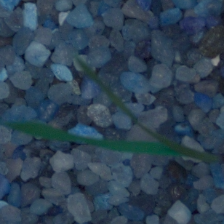

In [107]:
#show some images, change the 50 to display other images
image = Image.fromarray(trainImg[50])
image

In [1]:
#now, let's train our model
history = model.fit(trainImg, trainTarget, batch_size=10, epoch = 1)

NameError: name 'model' is not defined